<a href="https://colab.research.google.com/github/anna-danielle/anna-danielle/blob/main/Anna_Danielle_Clustering_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim
In this exercise, I will demonstrate my knowledge of clustering with a given data set. Specifically, I will perform clustering using the K-means and Birch methods and determine which method of clustering is more suitable for our data set using silhoutte values. First, I will perform clustering on the samples, and then perform clustering on the genes from the data set.

#Step 1
First, we must import the necessary packages and load the data dentoed CLINE which provided from research published on BioMed Central by researchers who aimed to study the omics and therapeutic responses of breast cancer cell lines "to identify the most predictive molecular feature sets" (Daeman et al. BMC).

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.cluster import KMeans #Package for Kmeans clustering
from sklearn.cluster import Birch #Package for Birch clustering
from sklearn.metrics import silhouette_samples, silhouette_score #Package for Silhouette values
#load datasets
CLINE = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_ExprData.txt',sep='\t',header=(0)) 
CLINE

,id,184A1,184B5,21MT1,21NT,21PT,600MPE,AU565,BT474,BT483,...,SUM225CWN,SUM229PE,SUM52PE,T47D,T47D_Kbluc,UACC812,UACC893,ZR751,ZR7530,ZR75B
0,Group,Normal-like,Normal-like,Basal,Basal,Basal,Luminal,Luminal,Luminal,Luminal,...,Luminal,Basal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal
1,ENSG00000000419,6.06,5.25,5.15,5.36,5.22,5.32,5.3,6.64,5.6,...,5.82,6.4,4.67,6.01,6.39,7.71,5.7,5.85,5.34,5.07
2,ENSG00000001036,4.47,5.39,5.28,5.82,5.75,6.11,4.8,4.47,4.99,...,5.51,5.14,6.22,5.07,5.3,5.76,5.4,4.27,5.03,5.68
3,ENSG00000001084,4.47,6,5.77,5.76,5.76,5.78,4.01,5.14,5.11,...,6.63,4.38,6.38,4.52,4.16,3.24,4.35,2.49,5.89,4.37
4,ENSG00000001497,5.27,4.27,6.58,5.54,5.57,4.93,6.16,5.36,5.1,...,4.69,6.16,5.11,4.79,4.95,5.83,4.89,5.33,4.23,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,ENSG00000270016,0.04,0,0,0.16,0,1.26,0,0.27,0.24,...,0,0,0.72,0,0,0,0,0,0.27,0
6913,ENSG00000270149,4.39,4.98,4.78,5.07,4.81,0,5.49,3.93,5.41,...,5.66,5.18,5.03,5.78,4.86,5.08,6.3,5.38,3.93,3.99
6914,ENSG00000270161,4.09,3.9,6.49,6.22,6.35,3.68,5.96,4.78,4.83,...,3.53,4.35,4,4.97,4.37,4.88,5.56,2.84,3.87,4.67
6915,ENSG00000270168,2.17,1.6,2.7,3.12,3.79,4.19,4.39,4.91,2.1,...,6.57,3.8,4.13,3.33,3.92,0,5.6,7.68,5.25,7.21


#Step 2
Before we can begin clustering our data, we must clean it. 

In [ ]:
#We will clean and fit our data by removing excess columns/labels, creating labels, 
labels_list =CLINE.loc[[0]] 
sample_names = CLINE.loc[0] 
sample_names = list(CLINE)[1:] 
labels = np.unique(labels_list) 
labels = np.delete(labels, np.where(labels == 'Group')) 
flabels = labels_list.loc[0,:].values[1:]
CLINEdf = CLINE.drop([0]) 
 
CLINEdf= CLINEdf.drop(['id'], axis=1) 
CLINEdf = CLINEdf.transpose() 
CLINEdf.shape

(52, 6916)

#Step 3
Now that our data has been organized, we can begin clustering. First we will begin with K-Means, and then we perform Birch.

In [ ]:
#KMEANS CLUSTERING
kmeans_m = KMeans(n_clusters=4).fit(CLINEdf)
kmeans_m

KMeans(n_clusters=4)

In [ ]:
#Birch Clustering
birch_m = Birch(n_clusters=4).fit(CLINEdf)
birch_m

Birch(n_clusters=4)

In [ ]:
#Comparing the 2 clusters numerically
d = {'Samples':sample_names, 'Labels':flabels, 'Kmeans':kmeans_m.labels_, 'Birch':birch_m.labels_}
df = pd.DataFrame(d)
print(df)

        Samples       Labels  Kmeans  Birch
0         184A1  Normal-like       0      1
1         184B5  Normal-like       0      1
2         21MT1        Basal       0      1
3          21NT        Basal       0      1
4          21PT        Basal       0      1
5        600MPE      Luminal       1      0
6         AU565      Luminal       2      2
7         BT474      Luminal       1      0
8         BT483      Luminal       1      0
9         BT549  Claudin-low       3      3
10        CAMA1      Luminal       1      0
11      EFM192A      Luminal       2      2
12      EFM192B      Luminal       2      2
13      EFM192C      Luminal       2      2
14      HCC1143        Basal       0      1
15      HCC1395  Claudin-low       3      3
16      HCC1419      Luminal       1      0
17      HCC1428      Luminal       1      0
18      HCC1569        Basal       0      1
19      HCC1806        Basal       0      1
20      HCC1937        Basal       0      1
21      HCC1954        Basal    

When looking as this table, the data set using KMeans clustering appears to be a better method for grouping the samples, because more of the samples are accounted in the KMeans clustering, as many of the samples were not accounted for with Birch clustering (denoted by 0). Specifically, the Birch cluster method appears to have the most difficulty assigning the Normal-Like and Basal samples to clusters. To verify I will perform a confusion matrx.

# Confusion Matrix
A confusion matrix is a

In [ ]:
df1 = pd.crosstab(df.Labels, df.Kmeans, margins=True)
df2 = pd.crosstab(df.Labels, df.Birch, margins=True)

Text(0.5, 1.0, ' Birch Cluster Prediction')

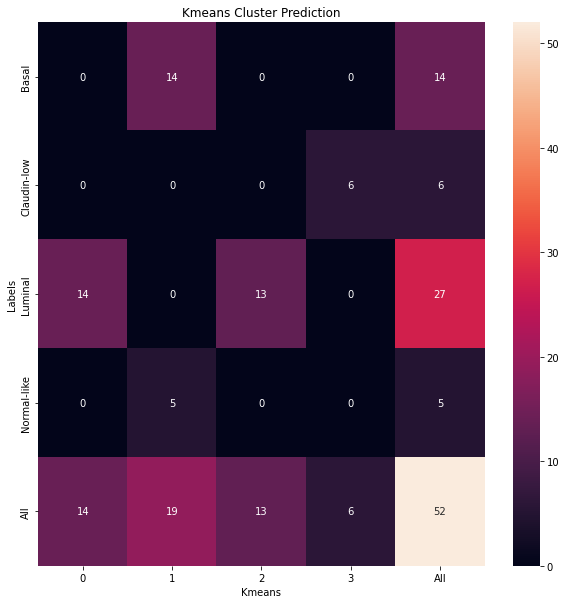

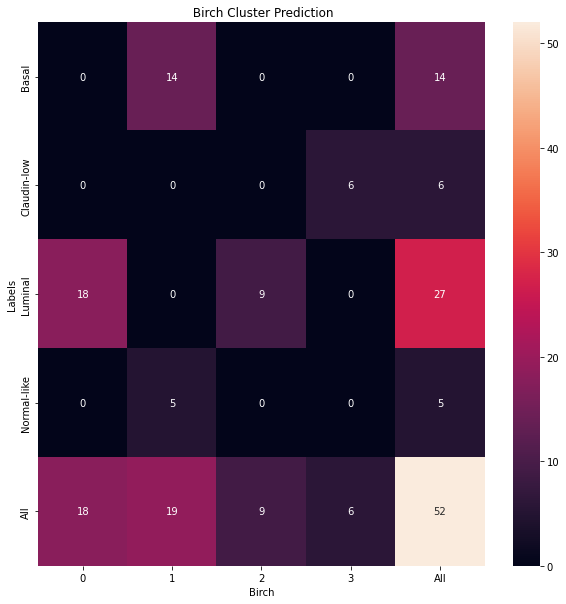

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df1, annot=True)
plt.title("Kmeans Cluster Prediction", fontsize =12)

plt.figure(figsize=(10, 10))
sns.heatmap(df2, annot=True)
plt.title(" Birch Cluster Prediction", fontsize =12)


Both clustering methods seemingly have almost the same sample clustering. The Normal-Like samples appear to be the most difficult to cluster.


#Silhouette Values



For 2.0 clusters the average silhouette_score is: 0.1461819188252243


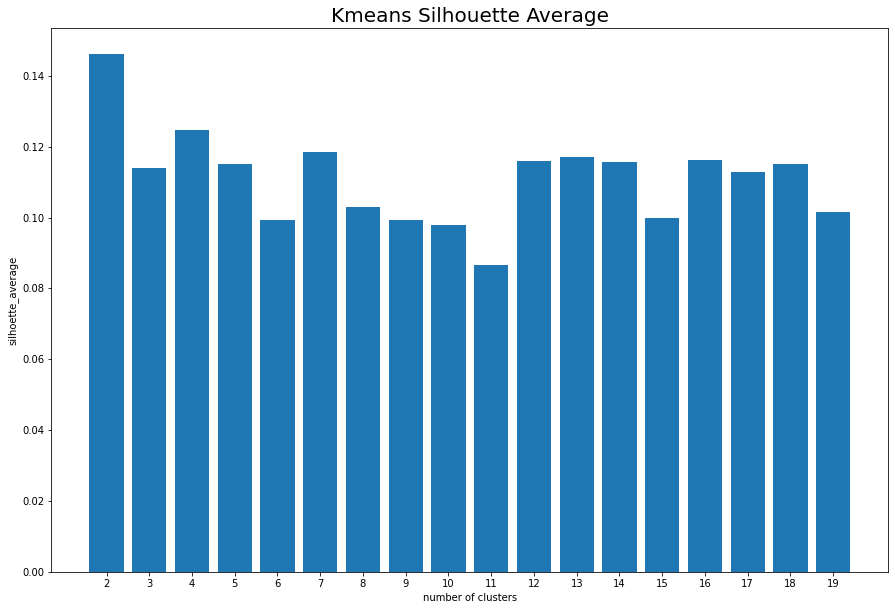

In [ ]:
#prepare a dataframe for cluster silhouette values
df_scores_kmeans = pd.DataFrame()

for i in range (2,20):
  kmeans_m = KMeans(n_clusters=i).fit(CLINEdf)
  cluster_labels = kmeans_m.fit_predict(CLINEdf)
  silhouette_avg = silhouette_score(CLINEdf, cluster_labels)
  df_scores_kmeans = df_scores_kmeans.append({'clust':i,'silhouette_avg': silhouette_avg}, ignore_index=True)

max_sil_value = df_scores_kmeans.silhouette_avg.max()
max_sil_clust = df_scores_kmeans.iloc[df_scores_kmeans.silhouette_avg.argmax(), 0]
print("For %s clusters" %(max_sil_clust), "the average silhouette_score is:", max(df_scores_kmeans.silhouette_avg))

plt.figure(figsize=(15, 10))
plt.bar(df_scores_kmeans.clust, df_scores_kmeans.silhouette_avg)
plt.xlabel('number of clusters')
plt.ylabel('silhoette_average')
plt.title("Kmeans Silhouette Average", fontsize=20)
plt.xticks(np.arange(2, 20, 1.0));

Because the K-means silhouette values have high variability (the values increase and decrease often), it is best to determine the cluster representation quality, I will perform K-means inertia analysis.

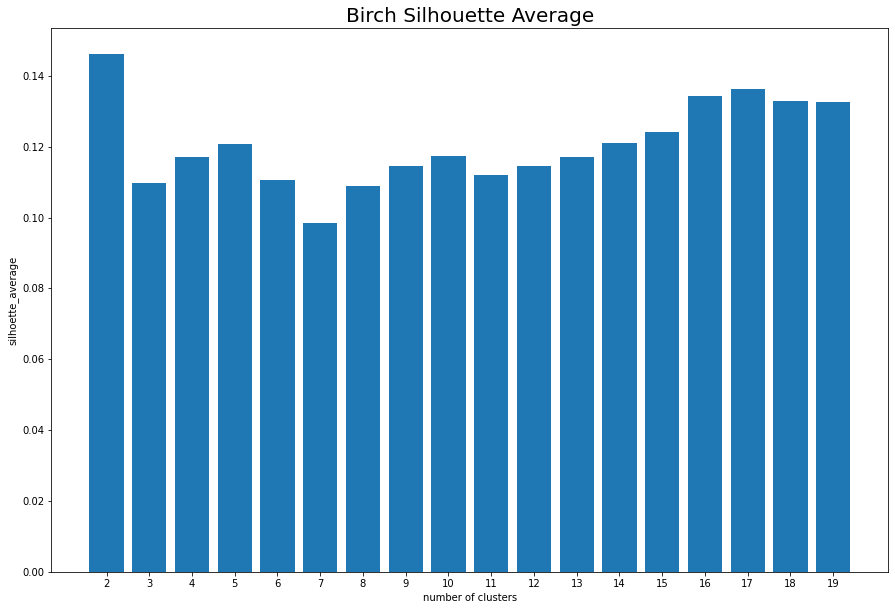

In [ ]:
df_scores_birch = pd.DataFrame()

for i in range (2,20):
  birch_m = Birch(n_clusters=i).fit(CLINEdf)
  cluster_labels = birch_m.fit_predict(CLINEdf)
  silhouette_avg = silhouette_score(CLINEdf, cluster_labels)
  df_scores_birch = df_scores_birch.append({'clust':i,'silhouette_avg': 
                                            silhouette_avg}, ignore_index=True)
plt.figure(figsize=(15, 10))
plt.bar(df_scores_birch.clust, df_scores_birch.silhouette_avg)
plt.xlabel('number of clusters')
plt.ylabel('silhoette_average')
plt.title("Birch Silhouette Average", fontsize=20)
plt.xticks(np.arange(2, 20, 1.0));

The Birch Silhouette also has a lot of variability (increasing/decreasing), so we will use the elbow method for determining the optimal amoount of clustering. The optimal amount of clusters for Birch clustering to group the data is between 2-3 which is represented by the big decline between 2 and 3 on the bar graph.

#KMEANS Intertia

188177.62021166674


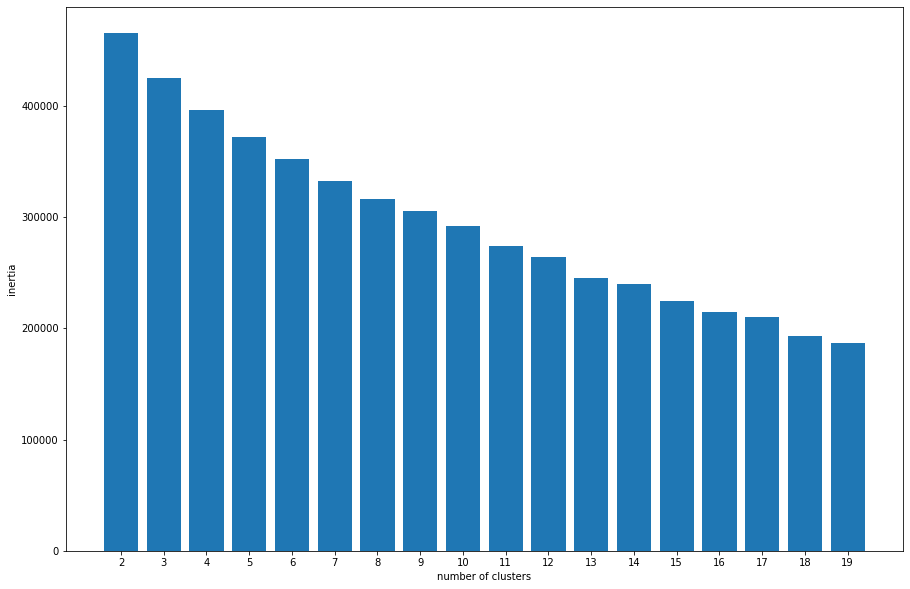

In [ ]:
print(kmeans_m.inertia_)
df1 = pd.DataFrame()
for i in range (2,20):
  kmeans_m = KMeans(n_clusters=i).fit(CLINEdf)
  df1 = df1.append({'clust':i,'inertia': kmeans_m.inertia_}, ignore_index=True)

plt.figure(figsize=(15, 10))
plt.bar(df1.clust, df1.inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(df1.clust), max(df1.clust)+1, 1.0));

In [ ]:
for i in range (2,20):
    kmeans_m = KMeans(n_clusters=i).fit(datafinal)
    inertia_df = inertia_df.append({'clust':i,'inertia': kmeans_m.inertia_}, ignore_index=True)
    inertia_df.plot('clust', 'inertia', marker='o',
    figsize=(10,8), color = 'r',title='KMeans Cluster Inertia',
    sharex=False,grid=True).set(ylabel='SSE / inertia',xlabel='Number of clusters',
xticks= np.arange(min(inertia_df.clust), max(inertia_df.clust)+1, 1.0),
yticks= np.arange(min(inertia_df.inertia), max(inertia_df.inertia)+1, 50000))
plt.plot()

NameError: ignored

Using k-means inertia, we can determine that the optimal clusters for the kmeans method is between 3 and 4 which is denoted by the biggest declines using the elbow method. However, if the inertia increased as the number of clusters increased then, the inverse can be said to be true about the clustering (as the number of clusters decreased so does the amount of inertia), and the kmeans would be optimized as a good model.

# Visual Evaluation: PCA

Using the clustering labels, we can perform a Principle Component Analysis to determine how accurate each clustering method is in representing the data.

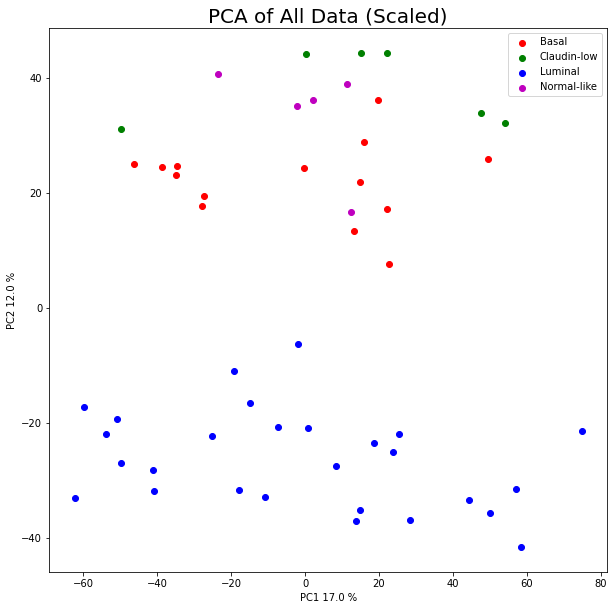

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaled = StandardScaler() 
scaled.fit(CLINEdf) 
scaled_CLINEdf = scaled.transform(CLINEdf) 

#Run Principal Component Analysis
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(scaled_CLINEdf) 
xpca = pca.transform(scaled_CLINEdf)

#create dataframe for PCA
df_pca = pd.DataFrame(xpca)

PC1 = 0
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if flabels[i] == 'Basal': 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Claudin-low': 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Luminal': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Normal-like': 
    c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='m') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['Basal', 'Claudin-low', 'Luminal', 'Normal-like']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100} %') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100} %') 
plt.title("PCA of All Data (Scaled)", fontsize=20)
plt.show() 

In [ ]:
# define and fit the model
n_clust = 3

kmeans_m = KMeans(n_clusters=n_clust).fit(CLINEdf)
birch_m = Birch(n_clusters=n_clust).fit(CLINEdf)

Plot data on PCA to evaluate:

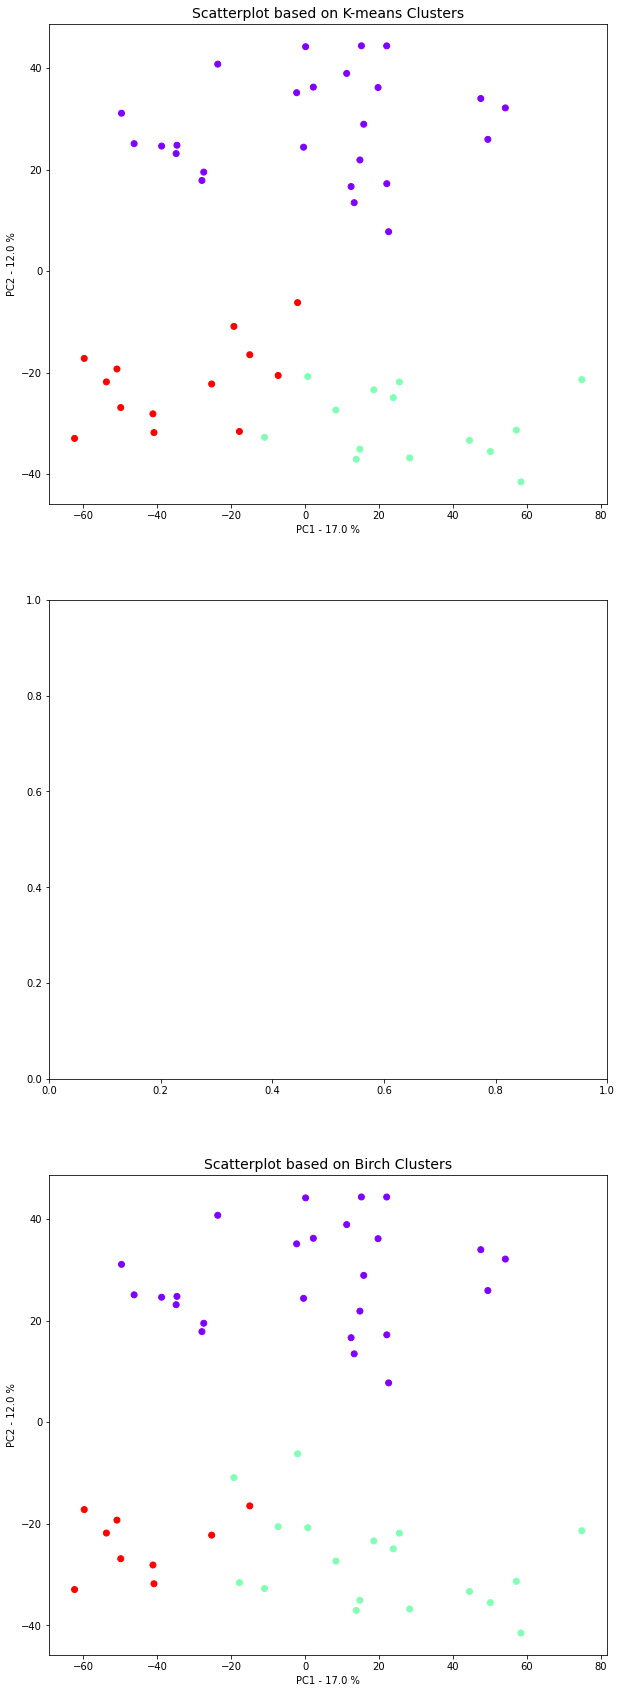

In [ ]:
fig, ax = plt.subplots(3, figsize=(10, 30))

#Plot scatterplot for K-means Clustering
ax[0].scatter(df_pca[0], df_pca[1], c = kmeans_m.labels_, cmap ='rainbow')
ax[0].set_title("Scatterplot based on K-means Clusters", fontsize=14)
ax[0].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[0].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Birch Clustering
ax[2].scatter(df_pca[0], df_pca[1], c = birch_m.labels_, cmap ='rainbow')
ax[2].set_title("Scatterplot based on Birch Clusters", fontsize=14)
ax[2].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[2].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

plt.show()

Both the Birch and Kmeans clustering methods show no apparent outliers in their 2D PCAs. We can verify the presence of outliers using a 3D PCA.

In [ ]:
pca3D = PCA(n_components=3) 
pca3D.fit(scaled_CLINEdf)
xpca3D = pca3D.transform(scaled_CLINEdf)

#Finally we will create our PCA figure using matplotlib, label the plot and 
#show it using a Scatter plot, for loop through PCA data and check full labels 
#list for group to set marker

PC1 = 0 
PC2 = 1 
PC3 = 3

#create dataframe for PCA
df_pca3D = pd.DataFrame(xpca3D)

#Add column names
df_pca3D.columns = ['P1', 'P2', 'P3']

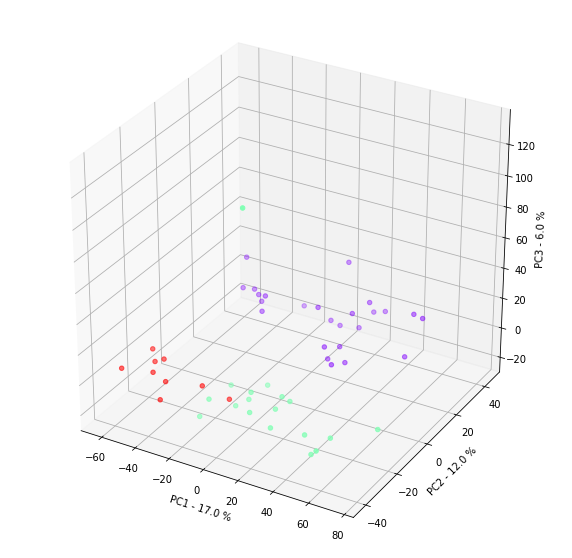

In [ ]:
#
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca3D['P1']
y = df_pca3D['P2']
z = df_pca3D['P3']

ax.scatter(x, y, z, c = birch_m.labels_, cmap ='rainbow')
ax.set_xlabel(f'PC1 - {round(pca3D.explained_variance_ratio_[0],2)*100} %')
ax.set_ylabel(f'PC2 - {round(pca3D.explained_variance_ratio_[1],2)*100} %')
ax.set_zlabel(f'PC3 - {round(pca3D.explained_variance_ratio_[2],2)*100} %')

plt.show()

There appears to be an outlier,but it is a bit difficult to get an estimate of its exact coordinates. Spinning our 3D PCA model will help to get grasp of the outlier.

In [ ]:
from IPython.display import HTML
from matplotlib import animation

def animate(frame):
  ax.view_init(30, frame/4)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
HTML(anim.to_html5_video())

This rotating PCA shows a green outlier with approximate coordinates at (-42,120,0).  Using our PCA for all the data, we can conclude that the outlier falls in the Claudin-low sample group.

In order to compare the clustering of the genes instead of the samples, we must perform tsne.

#TSNE 
t-Distributed Stochastic Neighbor Embedding is a method of unsupervised machine learning that implemented for data analysis. In this exercise, I will use TSNE to separate the cell line genes through the probablities of similar expression.

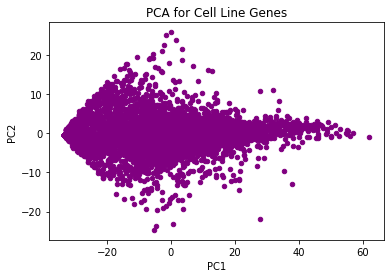

In [ ]:
#Because we already cleaned the data, we can go ahead and create a pca for all the genes from the CLINE data set.
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

CLINEdf1= CLINE.drop([0]) 
geneids = CLINEdf1['id']
CLINEdf1.set_index(['id'], inplace=True)
datafinal = CLINEdf1.astype(float)
pca_all = PCA().fit(datafinal)
X_pca = pca_all.transform(datafinal)
d = {'GeneIds':geneids, 'PC1':X_pca[:,0], 'PC2':X_pca[:,1]}
df = pd.DataFrame(d)
df.plot.scatter(x='PC1', y='PC2', c ="purple", title="PCA for Cell Line Genes")


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


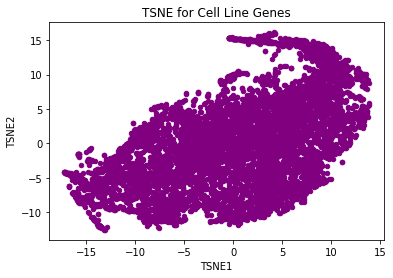

In [ ]:
X_pca = pca_all.transform(datafinal)
tsne_em = TSNE(n_components=2, perplexity=40.0, early_exaggeration=10, n_iter=500, n_iter_without_progress = 50, learning_rate=20, verbose=0).fit_transform(X_pca)
d = {'GeneIds':geneids, 'PC1':X_pca[:,0], 'PC2':X_pca[:,1], 'TSNE1':tsne_em[:,0], 'TSNE2':tsne_em[:,1]}
df1 = pd.DataFrame(d)
df1.plot.scatter(x='TSNE1', y='TSNE2', c ="purple", title="TSNE for Cell Line Genes")


#Reflection

Upon completion of this exercise, I determined that the K-means data set provided the most representative clustering for the samples. The method of inertia helped to verify the optimal amount of cluster being 3 or 4. I was also able to determine an outlier in the Claudin-Low sample after performing both clustering methods and a PCA. Unfortunately, I could not determine the gene clustering analysis using TSNE, because many ofthe genes were grouped together and were separately identified. However one can conclude that the genes with the TSNE around 13 are the most similarly expressed. 